In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
from scipy import stats
from pprint import pprint


# CollegeScorecard Key
from keys import dataKey

In [3]:
# Create base URL 

baseURL = 'https://api.data.gov/ed/collegescorecard/v1/schools/'

In [4]:
# Collect school information for currently operating non-online only schools that offer up to bachelors degree,graduate degrees, or both
# Sort by undergraduate size

# Fields collected:
#     latest.student.size,
#     latest.student.demographics.median_family_income,
#     school.name,
#     school.city,
#     school.state,
#     school.tuition_revenue_per_fte,
#     school.faculty_salary,
#     latest.admissions.admission_rate.overall,
#     latest.cost.attendance.academic_year,
#     latest.academics.program_reporter.programs_offered,
#     latest.completion.completion_rate_4yr_150nt,
#     latest.earnings.10_yrs_after_entry.median,
#     latest.student.share_25_older,
#     latest.student.demographics.age_entry,
#     latest.student.demographics.female_share,
#     latest.aid.median_debt.completers.overall,
#     latest.aid.students_with_any_loan,
#     school.ownership

    

params = {

    'api_key': dataKey,
    '_sort': 'latest.student.size:desc',
    'school.operating':'1',
    'school.online_only': '0',
    'school.degrees_awarded.highest__range': '3..4',
    '_per_page': '100',
    '_page': '0',
    '_fields': 'latest.student.size,latest.student.demographics.median_family_income,school.name,school.city,school.state,school.tuition_revenue_per_fte,school.faculty_salary,latest.admissions.admission_rate.overall,latest.cost.attendance.academic_year,latest.completion.completion_rate_4yr_150nt,latest.earnings.10_yrs_after_entry.median,latest.student.share_25_older,latest.student.demographics.age_entry,latest.student.demographics.female_share,latest.aid.median_debt.completers.overall,latest.aid.students_with_any_loan,school.ownership'
    
}

In [5]:
response0 = requests.get(baseURL, params=params)

schoolData0 = response0.json()

pprint(schoolData0)

{'metadata': {'page': 0, 'per_page': 100, 'total': 2641},
 'results': [{'latest.admissions.admission_rate.overall': None,
              'latest.aid.median_debt.completers.overall': 31977.0,
              'latest.aid.students_with_any_loan': 0.8428559903,
              'latest.completion.completion_rate_4yr_150nt': 0.1433,
              'latest.cost.attendance.academic_year': 20083,
              'latest.earnings.10_yrs_after_entry.median': 47100,
              'latest.student.demographics.age_entry': 32,
              'latest.student.demographics.female_share': 0.6972811618,
              'latest.student.demographics.median_family_income': 18602,
              'latest.student.share_25_older': 0.8601,
              'latest.student.size': 77269,
              'school.city': 'Tempe',
              'school.faculty_salary': 4485,
              'school.name': 'University of Phoenix-Arizona',
              'school.ownership': 3,
              'school.state': 'AZ',
              'school.tuitio

              'school.name': 'University of Nevada-Las Vegas',
              'school.ownership': 1,
              'school.state': 'NV',
              'school.tuition_revenue_per_fte': 7181},
             {'latest.admissions.admission_rate.overall': 0.4645,
              'latest.aid.median_debt.completers.overall': 12500.0,
              'latest.aid.students_with_any_loan': 0.4243943901,
              'latest.completion.completion_rate_4yr_150nt': 0.4713,
              'latest.cost.attendance.academic_year': 13612,
              'latest.earnings.10_yrs_after_entry.median': 46100,
              'latest.student.demographics.age_entry': 23,
              'latest.student.demographics.female_share': 0.6057798555,
              'latest.student.demographics.median_family_income': 22032,
              'latest.student.share_25_older': 0.2519,
              'latest.student.size': 24780,
              'school.city': 'Los Angeles',
              'school.faculty_salary': 9575,
              'school.

In [6]:
# schoolData0['results'][0]['school.name']

In [7]:
# Retrieve next page

params['_page']='1'
response1 = requests.get(baseURL, params=params)

schoolData1 = response1.json()

# pprint(schoolData1)

In [8]:
# schoolData1['results'][0]['school.name']

In [9]:
# Add returned schools from schoolData1 to schoolData0
# print(len(schoolData0['results']))
# print(len(schoolData1['results']))

schoolData0['results'].extend(schoolData1['results'])
# print(len(schoolData0['results']))
# pprint(schoolData0)

# Set original data variable to new overarching variable
schoolData = schoolData0
# print(len(schoolData['results']))
# pprint(schoolData)

In [10]:
# Repeat process 8 times, to end up with 1000 schools within schoolData
params['_page']='2'
response2 = requests.get(baseURL, params=params)
schoolData2 = response2.json()
schoolData['results'].extend(schoolData2['results'])

params['_page']='3'
response3 = requests.get(baseURL, params=params)
schoolData3 = response3.json()
schoolData['results'].extend(schoolData3['results'])

params['_page']='4'
response4 = requests.get(baseURL, params=params)
schoolData4 = response4.json()
schoolData['results'].extend(schoolData4['results'])

params['_page']='5'
response5 = requests.get(baseURL, params=params)
schoolData5 = response5.json()
schoolData['results'].extend(schoolData5['results'])

params['_page']='6'
response6 = requests.get(baseURL, params=params)
schoolData6 = response6.json()
schoolData['results'].extend(schoolData6['results'])

params['_page']='7'
response7 = requests.get(baseURL, params=params)
schoolData7 = response7.json()
schoolData['results'].extend(schoolData7['results'])

params['_page']='8'
response8 = requests.get(baseURL, params=params)
schoolData8 = response8.json()
schoolData['results'].extend(schoolData8['results'])

params['_page']='9'
response9 = requests.get(baseURL, params=params)
schoolData9 = response9.json()
schoolData['results'].extend(schoolData9['results'])

In [11]:
print(len(schoolData['results']))

1000


In [12]:
# Create empty lists to store school info

names = []
cities = []
states = []
size = []
admission = []
attendanceCost = []
faculty = []
revenue = []
completion = []
income = []
earnings = []
debt = []
loans = []
over25 = []
entryAge = []
females = []
males = []
ownership = []

In [13]:
# Fill list with results from schoolData
for i in range(len(schoolData['results'])):
    names.append(schoolData['results'][i]['school.name'])
    cities.append(schoolData['results'][i]['school.city'])
    states.append(schoolData['results'][i]['school.state'])
    ownership.append(schoolData['results'][i]['school.ownership'])
    size.append(schoolData['results'][i]['latest.student.size'])
    admission.append(schoolData['results'][i]['latest.admissions.admission_rate.overall'])
    attendanceCost.append(schoolData['results'][i]['latest.cost.attendance.academic_year'])
    faculty.append(schoolData['results'][i]['school.faculty_salary'])
    revenue.append(schoolData['results'][i]['school.tuition_revenue_per_fte'])
    completion.append(schoolData['results'][i]['latest.completion.completion_rate_4yr_150nt'])
    income.append(schoolData['results'][i]['latest.student.demographics.median_family_income'])
    earnings.append(schoolData['results'][i]['latest.earnings.10_yrs_after_entry.median'])
    debt.append(schoolData['results'][i]['latest.aid.median_debt.completers.overall'])
    loans.append(schoolData['results'][i]['latest.aid.students_with_any_loan'])
    over25.append(schoolData['results'][i]['latest.student.share_25_older'])
    entryAge.append(schoolData['results'][i]['latest.student.demographics.age_entry'])
    females.append(schoolData['results'][i]['latest.student.demographics.female_share'])    
    
print(len(females))


1000


In [14]:
#Append males list

for i in range(len(females)):
    try:
        males.append(1-females[i])
    except:
        males.append(np.nan)
        continue
    
print(len(males))

1000


In [15]:
# Put field lists into a dict
schoolDict = {
    
    'Name':names,'City':cities,'State':states,'School Ownership':ownership,'Number of Undergraduate Students':size, 
    'Share of Female Students':females,'Share of Male Students':males, 
    'Share of Undergraduates Aged 25 and Above':over25,'Average Age of Entry':entryAge,
    'Admission Rate':admission, 'Completion Rate':completion,
    'Median Earnings of Students 10 Years After Entry':earnings,'Median Debt for Students Who Have Completed':debt,
    'Share of Students Who Received a Federal Loan':loans,'Median Family Income':income,
    'Average Cost of Attendance':attendanceCost,'Average Faculty Salary':faculty, 
    'Net Tuition Revenue per Student':revenue 
    
}

In [16]:
# Create DataFrame using schoolDict

schoolDF = pd.DataFrame(schoolDict)

In [17]:
schoolDF.head()

,Name,City,State,School Ownership,Number of Undergraduate Students,Share of Female Students,Share of Male Students,Share of Undergraduates Aged 25 and Above,Average Age of Entry,Admission Rate,Completion Rate,Median Earnings of Students 10 Years After Entry,Median Debt for Students Who Have Completed,Share of Students Who Received a Federal Loan,Median Family Income,Average Cost of Attendance,Average Faculty Salary,Net Tuition Revenue per Student
0,University of Phoenix-Arizona,Tempe,AZ,3,77269,0.697281,0.302719,0.8601,32.0,NaN,0.1433,47100.0,31977.0,0.842856,18602.0,20083.0,4485.0,13180
1,Southern New Hampshire University,Manchester,NH,2,68214,0.676671,0.323329,0.7502,31.0,0.7805,0.4880,45400.0,18347.5,0.929532,27192.0,49005.0,8012.0,10531
2,University of Central Florida,Orlando,FL,1,56366,0.589145,0.410855,0.1791,23.0,0.4990,0.7001,45400.0,18130.0,0.698146,31400.0,20950.0,9881.0,5720
3,Texas A & M University-College Station,College Station,TX,1,52568,0.511678,0.488322,0.0297,20.0,0.7054,0.8210,58000.0,18519.5,0.804655,58904.0,28143.0,11165.0,10518
4,Miami Dade College,Miami,FL,1,51015,0.581050,0.418950,0.2815,22.0,NaN,0.3119,31100.0,8750.0,0.085088,18391.0,12476.0,7102.0,1729


In [18]:
schoolDF['Name'].count()

1000

In [19]:
schoolDF.to_csv('school_data.csv')

In [20]:
schoolData['results'][999]

{'latest.cost.attendance.academic_year': 36324,
 'latest.completion.completion_rate_4yr_150nt': 0.3519,
 'school.tuition_revenue_per_fte': 8637,
 'school.name': 'Lindsey Wilson College',
 'latest.student.size': 1958,
 'school.city': 'Columbia',
 'latest.student.share_25_older': 0.1702,
 'school.ownership': 2,
 'latest.student.demographics.age_entry': 23,
 'latest.student.demographics.median_family_income': 25540,
 'latest.earnings.10_yrs_after_entry.median': 28800,
 'school.state': 'KY',
 'school.faculty_salary': 5750,
 'latest.student.demographics.female_share': 0.6268221574,
 'latest.aid.median_debt.completers.overall': 18750.0,
 'latest.aid.students_with_any_loan': 0.8316326531,
 'latest.admissions.admission_rate.overall': None}

## START JADD SECTION ##
* working on a scatter plots
* second test pull request.

In [21]:
# school_data.csv

## END JADD SECTION

## Alex Work

Text(0.2, 0, 'Note:\nCircle size correlates with average faculty salary')

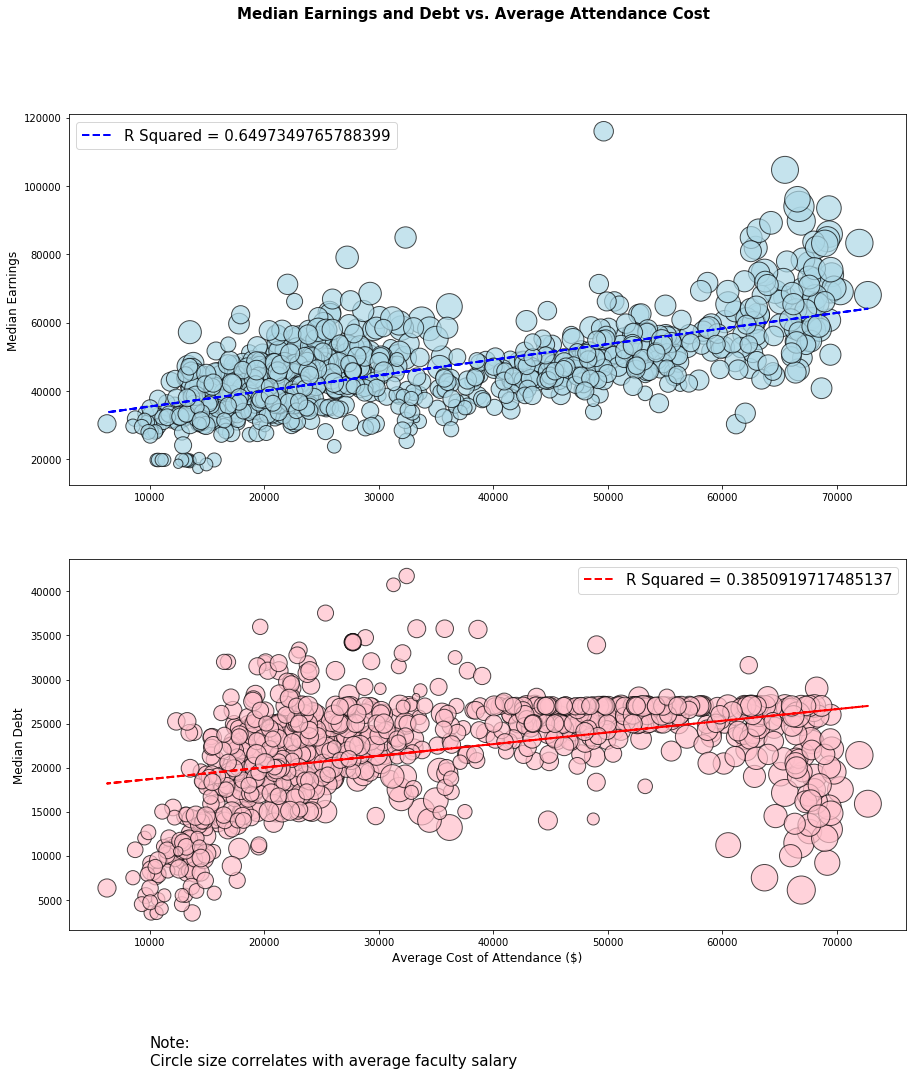

In [33]:
# Scatterplots where x value is attendance cost, y values are median earnings and median debt, s value is student size

# Create DF copy of schoolDF for name, attendance cost, earnings, and size
earningsDebtCostDF = schoolDF[['Name','Number of Undergraduate Students','Median Earnings of Students 10 Years After Entry','Median Debt for Students Who Have Completed','Average Cost of Attendance', 'Average Faculty Salary']]
earningsDebtCostDF.head()

# Check to see if there are any NaN values
# print(earningsDebtCostDF.count())

# Drop any school that doesn't report all metrics
earningsDebtCostDF.dropna(how='any',inplace=True)
# print(earningsDebtCostDF.count())

# Get linear regression values
earningsCostSlope, earningsCostInt, earningsCostR, earningsCostP, earningsCostStdErr = stats.linregress(earningsDebtCostDF['Average Cost of Attendance'], earningsDebtCostDF['Median Earnings of Students 10 Years After Entry'])
earningsCostFit = earningsCostSlope * earningsDebtCostDF['Average Cost of Attendance'] + earningsCostInt

debtCostSlope, debtCostInt, debtCostR, debtCostP, debtCostStdErr = stats.linregress(earningsDebtCostDF['Average Cost of Attendance'], earningsDebtCostDF['Median Debt for Students Who Have Completed'])
debtCostFit = debtCostSlope * earningsDebtCostDF['Average Cost of Attendance'] + debtCostInt

# Create Scatterplots
costFig, (earningsCostPlot, debtCostPlot) = plt.subplots(2, sharex=False, figsize=(15,15))
costFig.suptitle('Median Earnings and Debt vs. Average Attendance Cost', fontsize=15, fontweight='bold')




earningsCostPlot.scatter(earningsDebtCostDF['Average Cost of Attendance'], earningsDebtCostDF['Median Earnings of Students 10 Years After Entry'], 
            s=earningsDebtCostDF['Average Faculty Salary']*.04, marker='o', color='LightBlue', 
            alpha=.70, edgecolors='Black')
earningsCostPlot.plot(earningsDebtCostDF['Average Cost of Attendance'], earningsCostFit, 'b--', linewidth=2)
earningsCostPlot.set_ylabel('Median Earnings', fontsize=12)
earningsCostPlot.legend(['R Squared = ' + str(earningsCostR)], fontsize=15)


debtCostPlot.scatter(earningsDebtCostDF['Average Cost of Attendance'], earningsDebtCostDF['Median Debt for Students Who Have Completed'], 
            s=earningsDebtCostDF['Average Faculty Salary']*.04, marker='o', color='Pink', 
            alpha=.70, edgecolors='Black')
debtCostPlot.plot(earningsDebtCostDF['Average Cost of Attendance'], debtCostFit, 'r--', linewidth=2)
debtCostPlot.set_xlabel('Average Cost of Attendance ($)', fontsize=12)
debtCostPlot.set_ylabel('Median Debt', fontsize=12)
debtCostPlot.legend(['R Squared = ' + str(debtCostR)], fontsize=15)


plt.figtext(.2, 0,'Note:\nCircle size correlates with average faculty salary', fontsize=15)

In [23]:
# Change s axis to average faculty salary, make two new plots with x axis based on 'Number of Undergraduate Students' as well.

Text(0.2, 0, 'Note:\nCircle size correlates with average faculty salary')

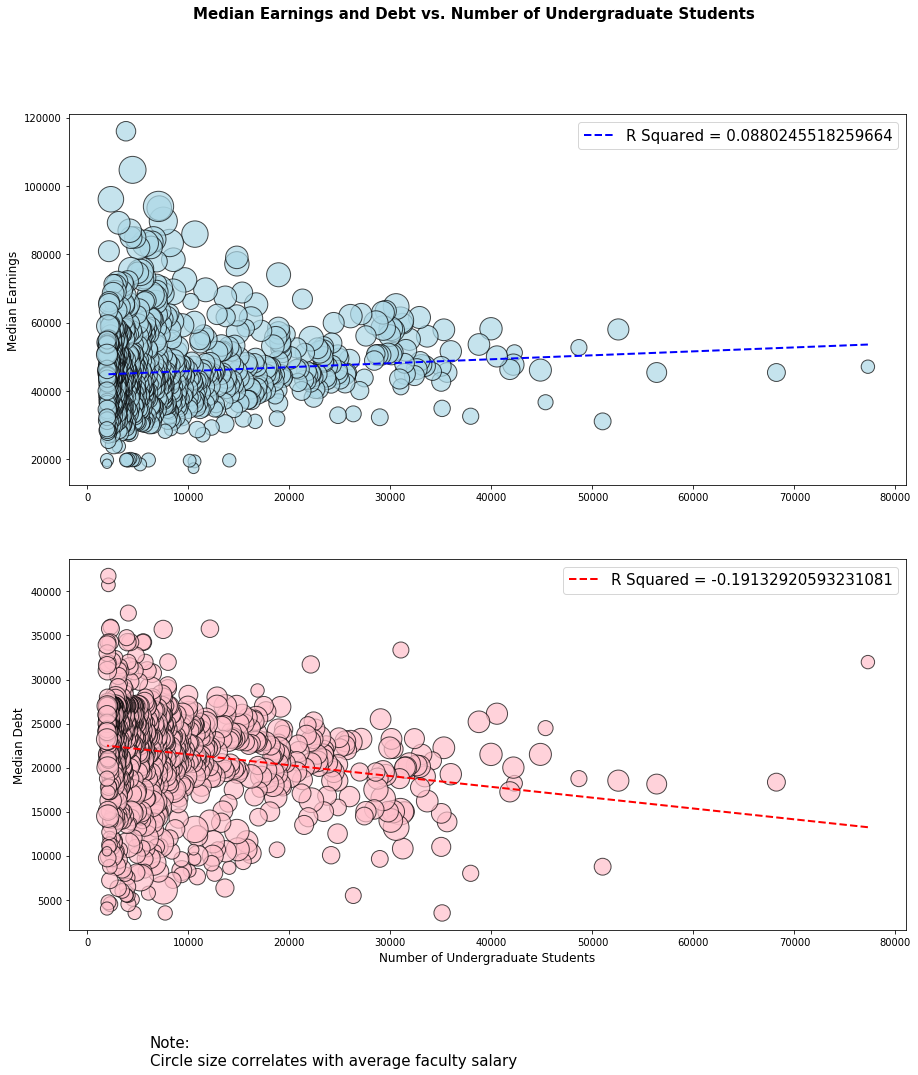

In [38]:
# Scatterplots where x value is attendance cost, y values are median earnings and median debt, s value is student size

# Create DF copy of schoolDF for name, attendance cost, earnings, and size
earningsDebtSizeDF = schoolDF[['Name','Number of Undergraduate Students','Median Earnings of Students 10 Years After Entry','Median Debt for Students Who Have Completed','Average Cost of Attendance', 'Average Faculty Salary']]
earningsDebtSizeDF.head()

# Check to see if there are any NaN values
# print(earningsDebtDFSize.count())

# Drop any school that doesn't report all metrics
earningsDebtSizeDF.dropna(how='any',inplace=True)
# print(earningsDebtSizeDF.count())

# Get linear regression values
earningsSizeSlope, earningsSizeInt, earningsSizeR, earningsSizeP, earningsSizeStdErr = stats.linregress(earningsDebtSizeDF['Number of Undergraduate Students'], earningsDebtSizeDF['Median Earnings of Students 10 Years After Entry'])
earningsSizeFit = earningsSizeSlope * earningsDebtSizeDF['Number of Undergraduate Students'] + earningsSizeInt

debtSizeSlope, debtSizeInt, debtSizeR, debtSizeP, debtSizeStdErr = stats.linregress(earningsDebtSizeDF['Number of Undergraduate Students'], earningsDebtSizeDF['Median Debt for Students Who Have Completed'])
debtSizeFit = debtSizeSlope * earningsDebtSizeDF['Number of Undergraduate Students'] + debtSizeInt

# Create Scatterplots
sizeFig, (earningsSizePlot, debtSizePlot) = plt.subplots(2, sharex=False, figsize=(15,15))
sizeFig.suptitle('Median Earnings and Debt vs. Number of Undergraduate Students', fontsize=15, fontweight='bold')




earningsSizePlot.scatter(earningsDebtSizeDF['Number of Undergraduate Students'], earningsDebtSizeDF['Median Earnings of Students 10 Years After Entry'], 
            s=earningsDebtSizeDF['Average Faculty Salary']*.04, marker='o', color='LightBlue', 
            alpha=.70, edgecolors='Black')
earningsSizePlot.plot(earningsDebtSizeDF['Number of Undergraduate Students'], earningsSizeFit, 'b--', linewidth=2)
earningsSizePlot.set_ylabel('Median Earnings', fontsize=12)
earningsSizePlot.legend(['R Squared = ' + str(earningsSizeR)], fontsize=15)


debtSizePlot.scatter(earningsDebtSizeDF['Number of Undergraduate Students'], earningsDebtSizeDF['Median Debt for Students Who Have Completed'], 
            s=earningsDebtSizeDF['Average Faculty Salary']*.04, marker='o', color='Pink', 
            alpha=.70, edgecolors='Black')
debtSizePlot.plot(earningsDebtDF['Number of Undergraduate Students'], debtSizeFit, 'r--', linewidth=2)
debtSizePlot.set_xlabel('Number of Undergraduate Students', fontsize=12)
debtSizePlot.set_ylabel('Median Debt', fontsize=12)
debtSizePlot.legend(['R Squared = ' + str(debtSizeR)], fontsize=15)


plt.figtext(.2, 0,'Note:\nCircle size correlates with average faculty salary', fontsize=15)

## End Alex Work